In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from IPython.display import Image
import seaborn as sns

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [2]:
#df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt")
#df_May_13 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt")
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url..
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422, 170429, 170506, 170513]
# week_nums = [160903, 160910, 160917] # Julia Test
df = get_data(week_nums)

In [3]:
df.columns = [column.strip() for column in df.columns]

In [4]:
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [5]:
# df.DATE.value_counts().sort_index()

In [6]:
df['KEY'] = df['C/A'] + ',' + df['UNIT'] + ',' + df['SCP'] + ',' + df['STATION']

In [7]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
KEY         object
dtype: object

In [8]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S")

In [9]:
df.DATETIME.head()

0   2017-04-15 00:00:00
1   2017-04-15 04:00:00
2   2017-04-15 08:00:00
3   2017-04-15 12:00:00
4   2017-04-15 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [10]:
#df['TIME'] = pd.to_datetime(df['TIME'])

In [11]:
#df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df['DAY'] = df.DATETIME.dt.dayofweek

In [13]:
#df.dtypes

In [14]:
df.shape

(789772, 14)

In [15]:
#df.head()

In [16]:
df.DESC.value_counts()

REGULAR       786722
RECOVR AUD      3050
Name: DESC, dtype: int64

In [17]:
# bronxDF = df.loc[df.STATION == 'EASTCHSTER/DYRE']

In [18]:
# bronxDF.shape

In [19]:
(df
 .groupby(["KEY", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,KEY,DATETIME,ENTRIES
109331,"G001,R151,00-00-00,CONEY IS-STILLW",2017-05-09 05:00:00,2
323055,"N329,R201,00-00-00,WOODHAVEN BLVD",2017-04-28 05:00:00,2
0,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00,1
526517,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-20 08:00:00,1
526508,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-18 20:00:00,1


In [20]:
# Explore the duplicate entries on 5/9
# mask = ((df["C/A"] == "G001") & 
# (df["UNIT"] == "R151") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "CONEY IS-STILLW") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 5, 9).date()))
# df[mask].head()

In [21]:
# Explore the duplicate entries on 4/28
# mask = ((df["C/A"] == "N329") & 
# (df["UNIT"] == "R201") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "WOODHAVEN BLVD") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 4, 28).date()))
# df[mask].head()

In [22]:
# df.sort_values(["KEY", "DATETIME"], inplace=True,
#               ascending = True)

In [23]:
df.drop_duplicates(subset=["KEY", "DATETIME"], inplace=True)

In [24]:
df.shape # two duplicates were removed

(789770, 14)

In [25]:
df.sort_values(["KEY", "DATETIME"], inplace=True, ascending=True)

In [26]:
# stationMax = df.groupby("STATION").ENTRIES.max()
# stationMax.sort_values(ascending=False)

In [27]:
# df.sort_values(["KEY",'DATETIME'],inplace=True)

In [28]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,"A002,R051,02-00-00,59 ST",2017-04-15 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,"A002,R051,02-00-00,59 ST",2017-04-15 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,"A002,R051,02-00-00,59 ST",2017-04-15 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,"A002,R051,02-00-00,59 ST",2017-04-15 16:00:00,5


In [29]:
df['ENTRYCOUNT'] = df.groupby("KEY")['ENTRIES'].diff()

In [30]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

df2 = df.copy()

In [31]:
df.sort_values('ENTRYCOUNT', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,DAY,ENTRYCOUNT
22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,2031090592,"C021,R212,00-00-02,59 ST",2017-04-21 08:00:00,4,2.020572e+09
195481,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,05/05/2017,09:00:00,1560221483,"R730,R431,00-00-04,EASTCHSTER/DYRE",2017-05-05 09:00:00,4,1.557696e+09
135682,R161B,R452,00-00-03,72 ST,123,IRT,04/30/2017,13:00:00,691260128,"R161B,R452,00-00-03,72 ST",2017-04-30 13:00:00,6,6.831548e+08
153362,R241A,R048,00-00-00,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,13:00:00,503289886,"R241A,R048,00-00-00,GRD CNTRL-42 ST",2017-05-04 13:00:00,3,4.884515e+08
103128,N550,R242,01-05-00,18 AV,F,IND,04/24/2017,16:00:00,117440513,"N550,R242,01-05-00,18 AV",2017-04-24 16:00:00,0,1.174379e+08
23499,C026,R215,01-06-01,86 ST,R,BMT,04/18/2017,16:00:00,117484688,"C026,R215,01-06-01,86 ST",2017-04-18 16:00:00,1,1.170130e+08
150431,R228,R143,00-00-04,28 ST,6,IRT,04/26/2017,17:00:00,100710462,"R228,R143,00-00-04,28 ST",2017-04-26 17:00:00,2,1.003657e+08
166407,R311,R053,00-05-00,3 AV-149 ST,25,IRT,04/28/2017,16:00:00,67108864,"R311,R053,00-05-00,3 AV-149 ST",2017-04-28 16:00:00,4,6.710797e+07
16380,B022,R229,00-05-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,16796105,"B022,R229,00-05-00,AVENUE M",2017-04-30 12:00:00,6,1.673498e+07
16085,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,11:00:00,16796105,"B022,R229,00-00-00,AVENUE M",2017-04-30 11:00:00,6,1.600624e+07


In [32]:
#df["ABSENTRY"] = df.ENTRYCOUNT.abs()

In [33]:
#df.ABSENTRY.isnull

In [34]:
sum(abs(df.ENTRYCOUNT) > 10000)/len(df)

7.5971485369158109e-05

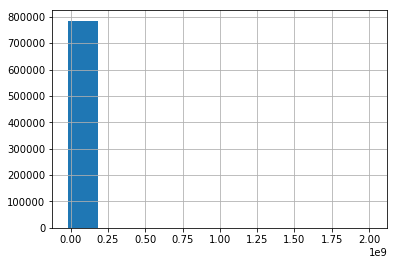

In [35]:
df.ENTRYCOUNT.hist()

In [36]:
# df = df.drop(['EXITS','DESC'],axis=1,errors='ignore')
# df2 = df.copy()

In [37]:
def clean_entries(row, max_counter):
    each = row["ENTRYCOUNT"]
    if each < 0:
        each = -each
    elif each > max_counter:
        return 0
    return each

df2['ENTRYCOUNT'] = df2.apply(clean_entries, axis=1, max_counter=10000)

In [38]:
#df2StationMax = df2.groupby(['KEY','DATETIME']).ENTRYCOUNT.max()
#df2StationMax.sort_values(ascending=False)

In [39]:
# diffStationMin = df.groupby("STATION").ENTRYCOUNT.min()
# diffStationMin.sort_values(ascending=True)

In [40]:
# stationMax = df.groupby("STATION").ENTRYCOUNT.max()
# stationMax.sort_values(ascending=False)

In [41]:
stationDF = df2.groupby("STATION").ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [42]:
stationDF.head(20)

,STATION,ENTRYCOUNT
129,AVENUE M,32950369.0
232,GRD CNTRL-42 ST,23799337.0
61,34 ST-PENN STA,19803440.0
102,79 ST,17581999.0
346,SUTTER AV,11938189.0
109,86 ST,8172236.0
68,42 ST-PORT AUTH,8030682.0
194,CRESCENT ST,8025258.0
160,BRIGHTON BEACH,7247190.0
85,59 ST COLUMBUS,3458757.0


In [43]:
stationDF.to_csv("stations.csv",index_label="Index")

In [44]:
top100 = stationDF[:100]

In [45]:
len(top100)

100

In [46]:
top100.head()

,STATION,ENTRYCOUNT
129,AVENUE M,32950369.0
232,GRD CNTRL-42 ST,23799337.0
61,34 ST-PENN STA,19803440.0
102,79 ST,17581999.0
346,SUTTER AV,11938189.0


In [47]:
len(stationDF)

374

In [48]:
mid = stationDF[int(len(stationDF)/2):int((len(stationDF)/2)+5)]

In [49]:
mid.head()

,STATION,ENTRYCOUNT
248,INWOOD-207 ST,239271.0
74,4AV-9 ST,238134.0
288,NASSAU AV,234667.0
150,BEDFORD-NOSTRAN,224623.0
25,169 ST,223308.0


In [50]:
# Replace day nums with name of days
stationDF.DAY

## Challenge 5

In [38]:
turnstiles = df2.groupby(['C/A', 'UNIT', 'STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [39]:
type(turnstiles)

pandas.core.frame.DataFrame

In [40]:
turnstiles.head()

,C/A,UNIT,STATION,DATE,ENTRYCOUNT
0,A002,R051,59 ST,04/15/2017,7487.0
1,A002,R051,59 ST,04/16/2017,6951.0
2,A002,R051,59 ST,04/17/2017,12839.0
3,A002,R051,59 ST,04/18/2017,14583.0
4,A002,R051,59 ST,04/19/2017,14975.0


## Challenge 6

In [41]:
station = df.groupby(['STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [42]:
station.head()

,STATION,DATE,ENTRYCOUNT
0,1 AV,04/15/2017,11837.0
1,1 AV,04/16/2017,11716.0
2,1 AV,04/17/2017,17238.0
3,1 AV,04/18/2017,19657.0
4,1 AV,04/19/2017,22889.0


In [43]:
station1 = station.loc[station.STATION == '1 AV']

In [44]:
type(station1)

pandas.core.frame.DataFrame

In [45]:
# firstAveGroup = station.groupby('DATE')

In [47]:
# firstAveGroup.plot(x=firstAveGroup.indices,y='ENTRYCOUNT')

## Challenge 7

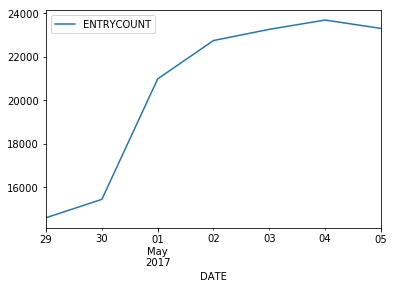

In [31]:
station1.plot(y='ENTRYCOUNT',x='DATE')

## Top 5 Stations based on Entries

In [105]:
top5stations = df.groupby('STATION').ENTRYCOUNT.sum().reset_index()

In [106]:
#top5stations = top5stations.sort_values('ENTRYCOUNT',ascending=False)

In [108]:
top5stations.loc[top5stations.STATION == 'EASTCHSTER/DYRE']

,STATION,ENTRYCOUNT
207,EASTCHSTER/DYRE,1.557721e+09


In [109]:
df.loc[df.STATION == 'EASTCHSTER/DYRE']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME,DAY,ENTRYCOUNT
195279,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,01:00:00,REGULAR,1334708,2553276,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 01:00:00,5,NaN
195280,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 05:00:00,5,0.000000e+00
195281,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 09:00:00,5,0.000000e+00
195282,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,13:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 13:00:00,5,0.000000e+00
195283,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,17:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 17:00:00,5,0.000000e+00
195284,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,21:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 21:00:00,5,0.000000e+00
195285,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,01:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 01:00:00,6,0.000000e+00
195286,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 05:00:00,6,0.000000e+00
195287,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 09:00:00,6,0.000000e+00
195288,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,13:00:00,REGULAR,1334708,2553280,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 13:00:00,6,0.000000e+00


In [34]:
df.ENTRYCOUNT.min()

-20235064.0

In [ ]:
# Replace Days with Name Days
##titanic.sex=titanic.sex.replace({'female':0,'male':1})